In [1]:
import numpy as np
import matplotlib.pyplot as plt
from salishsea_tools import viz_tools, places, visualisations
import netCDF4 as nc # unless you prefer xarray
import datetime as dt
import os
import glob
import cmocean

from IPython.display import Markdown, display
%matplotlib inline

### Load a file from the 201905 hindcast

In [2]:
f1=nc.Dataset('/data/sallen/results/MEOPAR/averages/SalishSea_jan_climate_2007_2019_dia2_T.nc')

In [3]:
f2=nc.Dataset('/data/sallen/results/MEOPAR/averages/SalishSea_feb_climate_2007_2019_dia2_T.nc')

In [4]:
f3=nc.Dataset('/data/sallen/results/MEOPAR/averages/SalishSea_mar_climate_2007_2019_dia2_T.nc')

In [5]:
f4=nc.Dataset('/data/sallen/results/MEOPAR/averages/SalishSea_apr_climate_2007_2019_dia2_T.nc')

In [6]:
f5=nc.Dataset('/data/sallen/results/MEOPAR/averages/SalishSea_may_climate_2007_2019_dia2_T.nc')

In [7]:
f6=nc.Dataset('/data/sallen/results/MEOPAR/averages/SalishSea_jun_climate_2007_2019_dia2_T.nc')

In [8]:
f7=nc.Dataset('/data/sallen/results/MEOPAR/averages/SalishSea_jul_climate_2007_2019_dia2_T.nc')

In [9]:
f8=nc.Dataset('/data/sallen/results/MEOPAR/averages/SalishSea_aug_climate_2007_2019_dia2_T.nc')

In [10]:
f9=nc.Dataset('/data/sallen/results/MEOPAR/averages/SalishSea_sep_climate_2007_2019_dia2_T.nc')

In [11]:
f10=nc.Dataset('/data/sallen/results/MEOPAR/averages/SalishSea_oct_climate_2007_2019_dia2_T.nc')

In [12]:
f11=nc.Dataset('/data/sallen/results/MEOPAR/averages/SalishSea_nov_climate_2007_2019_dia2_T.nc')

In [13]:
f12=nc.Dataset('/data/sallen/results/MEOPAR/averages/SalishSea_dec_climate_2007_2019_dia2_T.nc')

In [14]:
print(f1.variables.keys())

dict_keys(['nav_lat', 'nav_lon', 'bounds_lon', 'bounds_lat', 'area', 'deptht', 'deptht_bounds', 'HetMRub', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'MORTPHY', 'MORTMRUB', 'MORTDIAT', 'GRMESZDIAT', 'GRMESZMRUB', 'GRMESZPHY', 'GRMESZPON', 'GRMESZMICZ', 'GRMICZDIAT', 'GRMICZMRUB', 'GRMICZPHY', 'GRMICZPON', 'GRMICZMICZ'])


In [15]:
fe3t1=nc.Dataset('/data/sallen/results/MEOPAR/averages/SalishSea_jan_climate_2007_2019_carp_T.nc')

In [16]:
fe3t2=nc.Dataset('/data/sallen/results/MEOPAR/averages/SalishSea_feb_climate_2007_2019_carp_T.nc')

In [17]:
fe3t3=nc.Dataset('/data/sallen/results/MEOPAR/averages/SalishSea_mar_climate_2007_2019_carp_T.nc')

In [18]:
fe3t4=nc.Dataset('/data/sallen/results/MEOPAR/averages/SalishSea_apr_climate_2007_2019_carp_T.nc')

In [19]:
fe3t5=nc.Dataset('/data/sallen/results/MEOPAR/averages/SalishSea_may_climate_2007_2019_carp_T.nc')

In [20]:
fe3t6=nc.Dataset('/data/sallen/results/MEOPAR/averages/SalishSea_jun_climate_2007_2019_carp_T.nc')

In [21]:
fe3t7=nc.Dataset('/data/sallen/results/MEOPAR/averages/SalishSea_jul_climate_2007_2019_carp_T.nc')

In [22]:
fe3t8=nc.Dataset('/data/sallen/results/MEOPAR/averages/SalishSea_aug_climate_2007_2019_carp_T.nc')

In [23]:
fe3t9=nc.Dataset('/data/sallen/results/MEOPAR/averages/SalishSea_sep_climate_2007_2019_carp_T.nc')

In [24]:
fe3t10=nc.Dataset('/data/sallen/results/MEOPAR/averages/SalishSea_oct_climate_2007_2019_carp_T.nc')

In [25]:
fe3t11=nc.Dataset('/data/sallen/results/MEOPAR/averages/SalishSea_nov_climate_2007_2019_carp_T.nc')

In [26]:
fe3t12=nc.Dataset('/data/sallen/results/MEOPAR/averages/SalishSea_dec_climate_2007_2019_carp_T.nc')

In [27]:
# return times as datetime objects:
torig=dt.datetime.strptime(f1.variables['time_centered'].time_origin,'%Y-%m-%d %H:%M:%S')
print(torig)
times=np.array([torig + dt.timedelta(seconds=ii) for ii in f1.variables['time_centered'][:]])

1900-01-01 00:00:00


In [28]:
# load model mesh
with nc.Dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc') as fm:
    print(fm.variables.keys())
    tmask=fm.variables['tmask'][:,:,:,:]
    navlon=fm.variables['nav_lon'][:,:]
    navlat=fm.variables['nav_lat'][:,:]

dict_keys(['nav_lon', 'nav_lat', 'time_counter', 'tmask', 'umask', 'vmask', 'fmask', 'tmaskutil', 'umaskutil', 'vmaskutil', 'fmaskutil', 'glamt', 'glamu', 'glamv', 'glamf', 'gphit', 'gphiu', 'gphiv', 'gphif', 'e1t', 'e1u', 'e1v', 'e1f', 'e2t', 'e2u', 'e2v', 'e2f', 'ff', 'mbathy', 'misf', 'isfdraft', 'e3t_0', 'e3u_0', 'e3v_0', 'e3w_0', 'gdept_0', 'gdepu', 'gdepv', 'gdepw_0', 'gdept_1d', 'gdepw_1d', 'e3t_1d', 'e3w_1d'])


## Depth-Integrated Plots

##### Diatom Grazing

In [29]:
il=0
diat1=np.sum(f1.variables['GRMESZDIAT'][il,:,:,:]*fe3t1.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
diat2=np.sum(f2.variables['GRMESZDIAT'][il,:,:,:]*fe3t2.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
diat3=np.sum(f3.variables['GRMESZDIAT'][il,:,:,:]*fe3t3.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
diat4=np.sum(f4.variables['GRMESZDIAT'][il,:,:,:]*fe3t4.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
diat5=np.sum(f5.variables['GRMESZDIAT'][il,:,:,:]*fe3t5.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
diat6=np.sum(f6.variables['GRMESZDIAT'][il,:,:,:]*fe3t6.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
diat7=np.sum(f7.variables['GRMESZDIAT'][il,:,:,:]*fe3t7.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
diat8=np.sum(f8.variables['GRMESZDIAT'][il,:,:,:]*fe3t8.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
diat9=np.sum(f9.variables['GRMESZDIAT'][il,:,:,:]*fe3t9.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
diat10=np.sum(f10.variables['GRMESZDIAT'][il,:,:,:]*fe3t10.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
diat11=np.sum(f11.variables['GRMESZDIAT'][il,:,:,:]*fe3t11.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
diat12=np.sum(f12.variables['GRMESZDIAT'][il,:,:,:]*fe3t12.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)


/home/ksuchy/anaconda3/envs/py39/lib/python3.9/site-packages/numpy/ma/core.py:1021: RuntimeWarning: overflow encountered in multiply
  result = self.f(da, db, *args, **kwargs)


##### Flagellate Grazing

In [30]:
il=0
dino1=np.sum(f1.variables['GRMESZPHY'][il,:,:,:]*fe3t1.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
dino2=np.sum(f2.variables['GRMESZPHY'][il,:,:,:]*fe3t2.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
dino3=np.sum(f3.variables['GRMESZPHY'][il,:,:,:]*fe3t3.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
dino4=np.sum(f4.variables['GRMESZPHY'][il,:,:,:]*fe3t4.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
dino5=np.sum(f5.variables['GRMESZPHY'][il,:,:,:]*fe3t5.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
dino6=np.sum(f6.variables['GRMESZPHY'][il,:,:,:]*fe3t6.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
dino7=np.sum(f7.variables['GRMESZPHY'][il,:,:,:]*fe3t7.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
dino8=np.sum(f8.variables['GRMESZPHY'][il,:,:,:]*fe3t8.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
dino9=np.sum(f9.variables['GRMESZPHY'][il,:,:,:]*fe3t9.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
dino10=np.sum(f10.variables['GRMESZPHY'][il,:,:,:]*fe3t10.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
dino11=np.sum(f11.variables['GRMESZPHY'][il,:,:,:]*fe3t11.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
dino12=np.sum(f12.variables['GRMESZPHY'][il,:,:,:]*fe3t12.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)



##### Ciliate Grazing

In [31]:
il=0
cili1=np.sum(f1.variables['GRMESZMRUB'][il,:,:,:]*fe3t1.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
cili2=np.sum(f2.variables['GRMESZMRUB'][il,:,:,:]*fe3t2.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
cili3=np.sum(f3.variables['GRMESZMRUB'][il,:,:,:]*fe3t3.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
cili4=np.sum(f4.variables['GRMESZMRUB'][il,:,:,:]*fe3t4.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
cili5=np.sum(f5.variables['GRMESZMRUB'][il,:,:,:]*fe3t5.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
cili6=np.sum(f6.variables['GRMESZMRUB'][il,:,:,:]*fe3t6.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
cili7=np.sum(f7.variables['GRMESZMRUB'][il,:,:,:]*fe3t7.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
cili8=np.sum(f8.variables['GRMESZMRUB'][il,:,:,:]*fe3t8.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
cili9=np.sum(f9.variables['GRMESZMRUB'][il,:,:,:]*fe3t9.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
cili10=np.sum(f10.variables['GRMESZMRUB'][il,:,:,:]*fe3t10.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
cili11=np.sum(f11.variables['GRMESZMRUB'][il,:,:,:]*fe3t11.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
cili12=np.sum(f12.variables['GRMESZMRUB'][il,:,:,:]*fe3t12.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)

##### Microzooplankton Grazing

In [32]:
il=0
micz1=np.sum(f1.variables['GRMESZMICZ'][il,:,:,:]*fe3t1.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
micz2=np.sum(f2.variables['GRMESZMICZ'][il,:,:,:]*fe3t2.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
micz3=np.sum(f3.variables['GRMESZMICZ'][il,:,:,:]*fe3t3.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
micz4=np.sum(f4.variables['GRMESZMICZ'][il,:,:,:]*fe3t4.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
micz5=np.sum(f5.variables['GRMESZMICZ'][il,:,:,:]*fe3t5.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
micz6=np.sum(f6.variables['GRMESZMICZ'][il,:,:,:]*fe3t6.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
micz7=np.sum(f7.variables['GRMESZMICZ'][il,:,:,:]*fe3t7.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
micz8=np.sum(f8.variables['GRMESZMICZ'][il,:,:,:]*fe3t8.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
micz9=np.sum(f9.variables['GRMESZMICZ'][il,:,:,:]*fe3t9.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
micz10=np.sum(f10.variables['GRMESZMICZ'][il,:,:,:]*fe3t10.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
micz11=np.sum(f11.variables['GRMESZMICZ'][il,:,:,:]*fe3t11.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
micz12=np.sum(f12.variables['GRMESZMICZ'][il,:,:,:]*fe3t12.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)

In [33]:
##### PON Grazing

In [ ]:
il=0
pon1=np.sum(f1.variables['GRMESZPON'][il,:,:,:]*fe3t1.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
pon2=np.sum(f2.variables['GRMESZPON'][il,:,:,:]*fe3t2.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
pon3=np.sum(f3.variables['GRMESZPON'][il,:,:,:]*fe3t3.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
pon4=np.sum(f4.variables['GRMESZPON'][il,:,:,:]*fe3t4.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
pon5=np.sum(f5.variables['GRMESZPON'][il,:,:,:]*fe3t5.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
pon6=np.sum(f6.variables['GRMESZPON'][il,:,:,:]*fe3t6.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
pon7=np.sum(f7.variables['GRMESZPON'][il,:,:,:]*fe3t7.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
pon8=np.sum(f8.variables['GRMESZPON'][il,:,:,:]*fe3t8.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
pon9=np.sum(f9.variables['GRMESZPON'][il,:,:,:]*fe3t9.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
pon10=np.sum(f10.variables['GRMESZPON'][il,:,:,:]*fe3t10.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
pon11=np.sum(f11.variables['GRMESZPON'][il,:,:,:]*fe3t11.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
pon12=np.sum(f12.variables['GRMESZPON'][il,:,:,:]*fe3t12.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)

In [ ]:
intuz1=diat1+dino1+cili1+micz1+pon1
intuz2=diat2+dino2+cili2+micz2+pon2
intuz3=diat3+dino3+cili3+micz3+pon3
intuz4=diat4+dino4+cili4+micz4+pon4
intuz5=diat5+dino5+cili5+micz5+pon5
intuz6=diat6+dino6+cili6+micz6+pon6
intuz7=diat7+dino7+cili7+micz7+pon7
intuz8=diat8+dino8+cili8+micz8+pon8
intuz9=diat9+dino9+cili9+micz9+pon9
intuz10=diat10+dino10+cili10+micz10+pon10
intuz11=diat11+dino11+cili11+micz11+pon11
intuz12=diat12+dino12+cili12+micz12+pon12

<ipython-input-38-21246b6f1207>:13: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  m1=ax[0,0].pcolormesh(navlon,navlat,np.ma.masked_where(tmask[0,0,:,:]==0,(intuz1*86400*0.3*5.7*12/1000)),cmap=cmap0,vmin=0,vmax=0.5,shading='nearest')
<ipython-input-38-21246b6f1207>:21: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  m1=ax[0,1].pcolormesh(navlon,navlat,np.ma.masked_where(tmask[0,0,:,:]==0,(intuz2*86400*0.3*5.7*12/1000)),cmap=cmap0,vmin=0,vmax=0.5,shading='nearest')
<ipython-input-38-21246b6f1207>:29: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but 

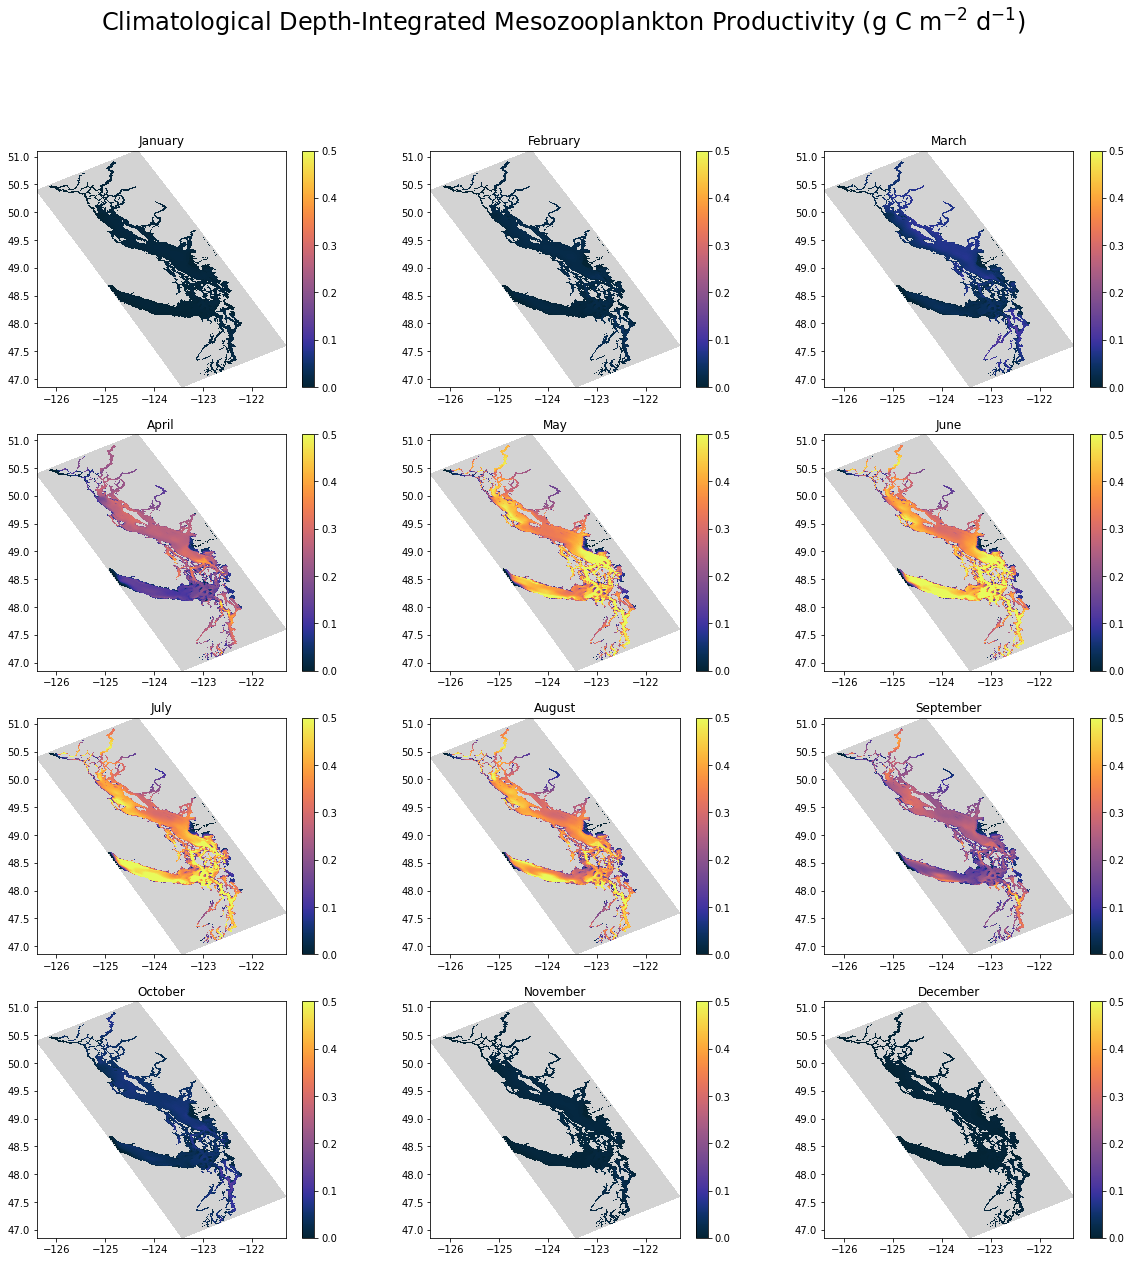

In [38]:
# with pcolormesh: no smoothing
cmap0=cmocean.cm.thermal
cmap0.set_bad('lightgrey')

#cmap1=cmocean.cm.haline
#cmap1.set_bad('k')

fig,ax=plt.subplots(4,3,figsize=(20,20))
fig.suptitle('Climatological Depth-Integrated Mesozooplankton Productivity (g C m$^{-2}$ d$^{-1}$)', fontsize=24)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
#intuz1=np.sum(f1.variables['mesozooplankton'][il,:,:,:]*fe3t1.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
#avguz=intuz/np.sum(fe3t.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
m1=ax[0,0].pcolormesh(navlon,navlat,np.ma.masked_where(tmask[0,0,:,:]==0,(intuz1*86400*0.3*5.7*12/1000)),cmap=cmap0,vmin=0,vmax=0.5,shading='nearest')
viz_tools.set_aspect(ax[0,0],coords='map')
ax[0,0].set_title('January');
fig.colorbar(m1,ax=ax[0,0])
#fig.savefig('SoGMesoZooProd_Jan.png',bbox_inches='tight')

#intuz2=np.sum(f2.variables['mesozooplankton'][il,:,:,:]*fe3t2.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
#avguz1=intuz1/np.sum(fe3t1.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
m1=ax[0,1].pcolormesh(navlon,navlat,np.ma.masked_where(tmask[0,0,:,:]==0,(intuz2*86400*0.3*5.7*12/1000)),cmap=cmap0,vmin=0,vmax=0.5,shading='nearest')
viz_tools.set_aspect(ax[0,1],coords='map')
ax[0,1].set_title('February');
fig.colorbar(m1,ax=ax[0,1])
#fig.savefig('SoGMesoZooProd_Feb.png',bbox_inches='tight')

#intuz3=np.sum(f3.variables['mesozooplankton'][il,:,:,:]*fe3t3.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
#avguz2=intuz2/np.sum(fe3t2.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
m1=ax[0,2].pcolormesh(navlon,navlat,np.ma.masked_where(tmask[0,0,:,:]==0,(intuz3*86400*0.3*5.7*12/1000)),cmap=cmap0,vmin=0,vmax=0.5,shading='nearest')
viz_tools.set_aspect(ax[0,2],coords='map')
ax[0,2].set_title('March');
fig.colorbar(m1,ax=ax[0,2])
#fig.savefig('SoGMesoZooProd_Mar.png',bbox_inches='tight')

#intuz4=np.sum(f4.variables['mesozooplankton'][il,:,:,:]*fe3t4.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
#avguz3=intuz3/np.sum(fe3t3.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
m1=ax[1,0].pcolormesh(navlon,navlat,np.ma.masked_where(tmask[0,0,:,:]==0,(intuz4*86400*0.3*5.7*12/1000)),cmap=cmap0,vmin=0,vmax=0.5,shading='nearest')
viz_tools.set_aspect(ax[1,0],coords='map')
ax[1,0].set_title('April');
fig.colorbar(m1,ax=ax[1,0])
#fig.savefig('SoGMesoZooProd_Apr.png',bbox_inches='tight')

#intuz5=np.sum(f5.variables['mesozooplankton'][il,:,:,:]*fe3t5.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
#avguz4=intuz4/np.sum(fe3t4.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
m1=ax[1,1].pcolormesh(navlon,navlat,np.ma.masked_where(tmask[0,0,:,:]==0,(intuz5*86400*0.3*5.7*12/1000)),cmap=cmap0,vmin=0,vmax=0.5,shading='nearest')
viz_tools.set_aspect(ax[1,1],coords='map')
ax[1,1].set_title('May');
fig.colorbar(m1,ax=ax[1,1])
#fig.savefig('SoGMesoZooProd_May.png',bbox_inches='tight')

#intuz6=np.sum(f6.variables['mesozooplankton'][il,:,:,:]*fe3t6.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
#avguz5=intuz5/np.sum(fe3t5.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
m1=ax[1,2].pcolormesh(navlon,navlat,np.ma.masked_where(tmask[0,0,:,:]==0,(intuz6*86400*0.3*5.7*12/1000)),cmap=cmap0,vmin=0,vmax=0.5,shading='nearest')
viz_tools.set_aspect(ax[1,2],coords='map')
ax[1,2].set_title('June');
fig.colorbar(m1,ax=ax[1,2])
#fig.savefig('SoGMesoZooProd_Jun.png',bbox_inches='tight')

#intuz7=np.sum(f7.variables['mesozooplankton'][il,:,:,:]*fe3t7.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
#avguz3=intuz3/np.sum(fe3t3.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
m1=ax[2,0].pcolormesh(navlon,navlat,np.ma.masked_where(tmask[0,0,:,:]==0,(intuz7*86400*0.3*5.7*12/1000)),cmap=cmap0,vmin=0,vmax=0.5,shading='nearest')
viz_tools.set_aspect(ax[2,0],coords='map')
ax[2,0].set_title('July');
fig.colorbar(m1,ax=ax[2,0])
#fig.savefig('SoGMesoZooProd_Jul.png',bbox_inches='tight')

#intuz8=np.sum(f8.variables['mesozooplankton'][il,:,:,:]*fe3t8.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
#avguz4=intuz4/np.sum(fe3t4.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
m1=ax[2,1].pcolormesh(navlon,navlat,np.ma.masked_where(tmask[0,0,:,:]==0,(intuz8*86400*0.3*5.7*12/1000)),cmap=cmap0,vmin=0,vmax=0.5,shading='nearest')
viz_tools.set_aspect(ax[2,1],coords='map')
ax[2,1].set_title('August');
fig.colorbar(m1,ax=ax[2,1])
#fig.savefig('SoGMesoZooProd_Aug.png',bbox_inches='tight')

#intuz9=np.sum(f9.variables['mesozooplankton'][il,:,:,:]*fe3t9.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
#avguz5=intuz5/np.sum(fe3t5.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
m1=ax[2,2].pcolormesh(navlon,navlat,np.ma.masked_where(tmask[0,0,:,:]==0,(intuz9*86400*0.3*5.7*12/1000)),cmap=cmap0,vmin=0,vmax=0.5,shading='nearest')
viz_tools.set_aspect(ax[2,2],coords='map')
ax[2,2].set_title('September');
fig.colorbar(m1,ax=ax[2,2])
#fig.savefig('SoGMesoZooProd_Sep.png',bbox_inches='tight')

#intuz10=np.sum(f10.variables['mesozooplankton'][il,:,:,:]*fe3t10.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
#avguz3=intuz3/np.sum(fe3t3.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
m1=ax[3,0].pcolormesh(navlon,navlat,np.ma.masked_where(tmask[0,0,:,:]==0,(intuz10*86400*0.3*5.7*12/1000)),cmap=cmap0,vmin=0,vmax=0.5,shading='nearest')
viz_tools.set_aspect(ax[3,0],coords='map')
ax[3,0].set_title('October');
fig.colorbar(m1,ax=ax[3,0])
#fig.savefig('SoGMesoZooProd_Oct.png',bbox_inches='tight')

#intuz11=np.sum(f11.variables['mesozooplankton'][il,:,:,:]*fe3t11.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
#avguz4=intuz4/np.sum(fe3t4.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
m1=ax[3,1].pcolormesh(navlon,navlat,np.ma.masked_where(tmask[0,0,:,:]==0,(intuz11*86400*0.3*5.7*12/1000)),cmap=cmap0,vmin=0,vmax=0.5,shading='nearest')
viz_tools.set_aspect(ax[3,1],coords='map')
ax[3,1].set_title('November');
fig.colorbar(m1,ax=ax[3,1])
#fig.savefig('SoGMesoZooProd_Nov.png',bbox_inches='tight')

#intuz12=np.sum(f12.variables['mesozooplankton'][il,:,:,:]*fe3t12.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
#avguz5=intuz5/np.sum(fe3t5.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
m1=ax[3,2].pcolormesh(navlon,navlat,np.ma.masked_where(tmask[0,0,:,:]==0,(intuz12*86400*0.3*5.7*12/1000)),cmap=cmap0,vmin=0,vmax=0.5,shading='nearest')
viz_tools.set_aspect(ax[3,2],coords='map')
ax[3,2].set_title('December');
fig.colorbar(m1,ax=ax[3,2])
#fig.savefig('SoGMesoZooProd_Dec.png',bbox_inches='tight')

##### Highest depth-integrated mesozoop biomass was observed in Northern SoG (east of Texada Island), Gulf Islands/tidal mixed regions, Puget Sound, and Strait of Juan de Fuca - particularly evident from May to August, i.e., when juvenile salmon are feeding/migrating

###### Related to freshwater discharge? Northern SoG seems to be seeded from Bute Inlet. Increase stratification?

In [38]:
f1.close()
fe3t1.close()

In [39]:
f2.close()
fe3t2.close()

In [40]:
f3.close()
fe3t3.close()

In [41]:
f4.close()
fe3t4.close()

In [42]:
f5.close()
fe3t5.close()

In [43]:
f6.close()
fe3t6.close()

In [44]:
f7.close()
fe3t7.close()

In [45]:
f8.close()
fe3t8.close()

In [46]:
f9.close()
fe3t9.close()

In [47]:
f10.close()
fe3t10.close()

In [48]:
f11.close()
fe3t11.close()

In [49]:
f12.close()
fe3t12.close()